# Automated Logistics Center 

This notebook devles into the decision-making process for a major e-commerce company that is considering upgrading one of its logistics centers. We will leverage the following:

* [Decision trees](https://en.wikipedia.org/wiki/Decision_tree) (do not confuse with [classification trees](https://en.wikipedia.org/wiki/Decision_tree_learning)).
* [Influence diagrams](https://en.wikipedia.org/wiki/Influence_diagram).

#### Table of contents:

1. Framing the decision problem

2. Quantifying the decision problem

3. Modelling the problem with a decision tree

4. Modelling the problem with an influence diagram

5. Solving the influence diagram

## 1 - Framing the decision problem

A major e-commerce company is considering upgrading its logistics center with an advanced robotic automation system to optimize order fulfillment. The company must choose between three options:

1. Implement a conventional robotics system (higher automation but still requiring human labor in certain areas).  
2. Implement an advanced robotic system (AI-powered automation with robotic arms for sorting and packaging).  
3. Make no investment and retain the current logistics system.  

While the advanced system promises significant efficiency improvements, it carries a higher risk of technical failures. The company must evaluate the potential benefits and risks before making a final decision.

<table>
<tr>
  <td>
    <img src="./images/logistics_center.jpg" alt="Logistics Center" width="500">
  </td>
</tr>
<tr>
<i><b>Figure 1.</b> Automated Logistics Center. (<a href="https://www.xataka.com/robotica-e-ia/primer-almacen-gestionado-integramente-robots-sigue-necesitando-a-humanos-5-tecnicos-para-tareas-mantenimiento">image source</a>)</i>
</tr>
</table>  

### 1.1 - Options and Probabilities  

#### Conventional Robotic System:  
- **Probability of smooth operation (no failures):** 0.95  
- **Probability of system failure:** 0.05  
- **Expected financial outcomes:**  
  - **If the system operates smoothly:** €6 million in operational cost savings and efficiency gains.  
  - **If the system fails:** -€3 million due to downtime, additional labor costs, and emergency repairs.  

#### Advanced Robotic System:  
- **Probability of success (no failures):** 0.70  
- **Probability of minor failures:** 0.20  
- **Probability of major failures:** 0.10  
- **Expected financial outcomes:**  
  - **If the system operates smoothly:** €15 million in efficiency gains, faster order processing, and lower long-term costs.  
  - **If minor failures occur:** -€4 million due to delays, temporary manual intervention, and repairs.  
  - **If major failures occur:** -€12 million due to prolonged downtime, system overhauls, and reputational damage.

### 1.2 - Optional System Feasibility Test  

To reduce uncertainty before committing to the advanced system, the company can conduct an **expensive feasibility test** on critical components. The test costs **€1 million** and provides insights into the likelihood of system success or failure. The test results fall into three categories: *bad (b), good (g), or excellent (e).*  

#### Test Result Probabilities  
The probability of each test result depends on the actual performance of the robotic system:  

- **If the advanced system is fully functional (success):**  
  - P(g | success) = 0.20  
  - P(e | success) = 0.80  
- **If minor failures are likely:**  
  - P(b | minor failure) = 0.30  
  - P(g | minor failure) = 0.55  
  - P(e | minor failure) = 0.15  
- **If major failures are likely:**  
  - P(b | major failure) = 0.40  
  - P(g | major failure) = 0.40  
  - P(e | major failure) = 0.20  

### 1.3 - Regulatory Constraints  

If the test results are **bad (b)**, the company is prohibited from proceeding with the advanced robotic system due to **internal safety regulations and compliance requirements**. In this case, the company must choose between implementing the conventional logistics system or making no investment.  

### 1.4 - Decision Objective  

The company must decide whether to:  
1. Proceed without testing and implement one of the logistics systems based on expected financial outcomes.  
2. Conduct the feasibility test to reduce uncertainty before committing to the advanced system, factoring in the additional cost of the test.  

The goal is to **maximize expected net profit** by balancing potential efficiency gains with the risks of failure and the cost of uncertainty reduction.

## 2 - Quantifying the decision problem

Let's specify this information explicitly.

### 2.1 - The utility table (<span style="color: blue">U</span>)

* <span style="color: red">T</span>: Perform the test, skip the test, or take no action.
* <span style="color: red">I</span>: Implement the advanced logistics system or the conventional system.
* <span style="color: purple">A</span>: Outcomes of implementing the advanced system.
* <span style="color: purple">C</span>: Outcomes of implementing the conventional system.

Notice that the test costs €1 million and that its result does not affect the utility table but does impact the expected utility.

<table>
    <tr>
        <th><span style="color: red">T</span></th>
        <th><span style="color: red">I</span></th>
        <th><span style="color: purple">A</span></th>
        <th><span style="color: purple">C</span></th>      
        <th><span style="color: blue">U</span></th>
    </tr>
    <tr>
        <td rowspan="6">test</td>
        <td rowspan="3">advanced</td>
        <td>-</td>
        <td>-</td>
        <td>0</td>
    </tr>
    <tr>
        <td rowspan="6">no test</td>
        <td>Advanced</td>
        <td>-</td>
        <td>-</td>
        <td>0</td>
    </tr>
    <tr>
        <td rowspan="6">nothing</td>
        <td>Advanced</td>
        <td>-</td>
        <td>-</td>
        <td>0</td>
    </tr>
</table>

### 2.2 - The prior probability distribution of the conventional system (<span style="color: purple">C</span>)

<table>
  <tr>
    <th colspan="2">P(<span style="color: purple">C</span>)</th>
  </tr>
  <tr>
    <td>smooth</td>
    <td>0.95</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>0.05</td>
  </tr>
</table>

### 2.3 - The prior probability distribution of the advanced system (<span style="color: purple">A</span>)

<table>
  <tr>
    <th colspan="2">P(<span style="color: purple">A</span>)</th>
  </tr>
  <tr>
    <td>smooth</td>
    <td>0.70</td>
  </tr>
  <tr>
    <td>minor failure</td>
    <td>0.20</td>
  </tr>
  <tr>
    <td>major failure</td>
    <td>0.10</td>
  </tr>
</table>

### 2.4 - The conditional probability of the test result (<span style="color: purple">R</span> | <span style="color: purple">A</span>)

The probability of each test result depends on the actual performance of the robotic system:  

<table>
    <tr>
        <th>P(<span style="color: purple">R</span> | <span style="color: purple">A</span>)</th>
        <th>Smooth</th>
        <th>Minor Failure</th>
        <th>Major Failure</th>
    </tr>
    <tr>
        <td>bad</td>
        <td>0.0</td>
        <td>0.30</td>
        <td>0.40</td>
    </tr>
    <tr>
        <td>good</td>
        <td>0.20</td>
        <td>0.55</td>
        <td>0.40</td>
    </tr>
    <tr>
        <td>excellent</td>
        <td>0.80</td>
        <td>0.15</td>
        <td>0.20</td>
    </tr>
</table>

## 3 - Modelling the problem with a decision tree

Notice that the test costs €1 million and that its result does not affect the utility table but does impact the expected utility.

<table>
<tr>
  <td>
    <img src="./images/logistics_decision_tree_horizontal.png" alt="Decision tree for automating the logistics center" width="900">
  </td>
</tr>
<tr>
<i><b>Figure 2.</b>Decision tree for automating the logistics center</i>
</tr>
</table>

## 4 - Modelling the problem with an influence diagram

<table>
<tr>
  <td>
    <img src="./images/logistics_influence_diagram.png" alt="Logistics system influence diagram" width="300">
  </td>
</tr>
<tr>
<i><b>Figure 3.</b> Logistics system influence diagram.</i>
</tr>
</table>

### 4.1 - Implementation with PyAgrum

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum as grum
import numpy as np
from pyAgrum import InfluenceDiagram

In [7]:
influence_diagram = InfluenceDiagram()

A = influence_diagram.addChanceNode(
    grum.LabelizedVariable("A", "C", 0)
    .addLabel('smooth')
    .addLabel('minor_failure')
    .addLabel('major_failure')
)

C = influence_diagram.addChanceNode(
    grum.LabelizedVariable("C", "C", 0)
    .addLabel('smooth')
    .addLabel('failure')
)

R = influence_diagram.addChanceNode(
    grum.LabelizedVariable("R", "R", 0)
    .addLabel('bad')
    .addLabel('good')
    .addLabel('excellent')
    .addLabel('no_results') # We add this extra state to represent the asymmetric case when T != test
)

T = influence_diagram.addDecisionNode(
    grum.LabelizedVariable("T", "T", 0)
    .addLabel('test')
    .addLabel('no_test')
    .addLabel('nothing')
)

I = influence_diagram.addDecisionNode(
    grum.LabelizedVariable("I", "I", 0)
    .addLabel('advanced')
    .addLabel('conventional')
)

U = influence_diagram.addUtilityNode(
    grum.LabelizedVariable("U", "U", 0)
    .addLabel('utility')
)

influence_diagram.addArc("T", "R")
influence_diagram.addArc("T", "I")  # memory arc
influence_diagram.addArc("T", "U")
influence_diagram.addArc("R", "I")
influence_diagram.addArc("I", "U")
influence_diagram.addArc("A", "R")
influence_diagram.addArc("A", "U")
influence_diagram.addArc("C", "U")

gnb.sideBySide(influence_diagram, captions=["Oil field influence diagram"])


In [21]:
influence_diagram.cpt(C)[:]=[0.95, 0.05]

influence_diagram.cpt(A)[:]=[0.70, 0.20, 0.10]

influence_diagram.cpt(R)[{"A": "smooth", "T": "test"}]=[0.0, 0.2, 0.8, 0.0] # R: bad, good, excellent, no_results
influence_diagram.cpt(R)[{"A": "smooth", "T": "no_test"}]=[0.0, 0.0, 0.0, 1.0]
influence_diagram.cpt(R)[{"A": "smooth", "T": "nothing"}]=[0.0, 0.0, 0.0, 1.0]
influence_diagram.cpt(R)[{"A": "minor_failure", "T": "test"}]=[0.3, 0.55, 0.15, 0.0]
influence_diagram.cpt(R)[{"A": "minor_failure", "T": "no_test"}]=[0.0, 0.0, 0.0, 1.0]
influence_diagram.cpt(R)[{"A": "minor_failure", "T": "nothing"}]=[0.0, 0.0, 0.0, 1.0]
influence_diagram.cpt(R)[{"A": "major_failure", "T": "test"}]=[0.4, 0.4, 0.2, 0.0]
influence_diagram.cpt(R)[{"A": "major_failure", "T": "no_test"}]=[0.0, 0.0, 0.0, 1.0]
influence_diagram.cpt(R)[{"A": "major_failure", "T": "nothing"}]=[0.0, 0.0, 0.0, 1.0]

# It is a bit weird because we are assigning it in a "backwards" manner
influence_diagram.utility(U)[{"T": "test", "I": "advanced", "A": "smooth" }]=np.array([14, 14])[:, np.newaxis] # C: smooth, failure
influence_diagram.utility(U)[{"T": "test", "I": "advanced", "A": "minor_failure" }]=np.array([-5, -5])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "test", "I": "advanced", "A": "major_failure" }]=np.array([-13, -13])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "test", "I": "conventional", "A": "smooth" }]=np.array([5, -4])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "test", "I": "conventional", "A": "minor_failure" }]=np.array([5, -4])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "test", "I": "conventional", "A": "major_failure" }]=np.array([5, -4])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "no_test", "I": "advanced", "A": "smooth" }]=np.array([15, 15])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "no_test", "I": "advanced", "A": "minor_failure" }]=np.array([-4, -4])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "no_test", "I": "advanced", "A": "major_failure" }]=np.array([-12, -12])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "no_test", "I": "conventional", "A": "smooth" }]=np.array([6, -3])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "no_test", "I": "conventional", "A": "minor_failure" }]=np.array([6, -3])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "no_test", "I": "conventional", "A": "major_failure" }]=np.array([6, -3])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "nothing", "I": "advanced", "A": "smooth" }]=np.array([0, 0])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "nothing", "I": "advanced", "A": "minor_failure" }]=np.array([0, 0])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "nothing", "I": "advanced", "A": "major_failure" }]=np.array([0, 0])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "nothing", "I": "conventional", "A": "smooth" }]=np.array([0, 0])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "nothing", "I": "conventional", "A": "minor_failure" }]=np.array([0, 0])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "nothing", "I": "conventional", "A": "major_failure" }]=np.array([0, 0])[:, np.newaxis]

In [22]:
gnb.showPotential(influence_diagram.cpt(C))
gnb.showPotential(influence_diagram.cpt(A))
gnb.showPotential(influence_diagram.cpt(R))
gnb.showPotential(influence_diagram.utility(U))

## 5 - Solving the influence diagram

Once the influence diagram is built, we can use inference algorithms to determine the optimal decision strategy that maximizes expected utility, given the uncertainties and dependencies present in the model.

The Shenoy-Shafer algorithm offers several advantages over other methods:

* Unified treatment of probabilities and utilities.
* Local computation approach.
* Flexibility in variable elimination.
* Modularity.
* Efficiency in handling LIMIDs.
* Reduced computational complexity.

[PyAgrum features an implementation of the Shenoy-Shafer algorithm tailored for LIMIDs through the `ShaferShenoyLIMIDInference` class.](https://pyagrum.readthedocs.io/en/latest/influenceDiagram.html#pyAgrum.ShaferShenoyLIMIDInference)

### 5.1 - Implementation with PyAgrum

In [23]:
inference_engine = gum.ShaferShenoyLIMIDInference(influence_diagram)
inference_engine.makeInference()

print(f"Is the diagram solvable?: {inference_engine.isSolvable()}")

Is the diagram solvable?: True


In [26]:
inference_engine.optimalDecision("T")

(pyAgrum.Potential@0x600003dbc320) 
  T                          |
test     |no_test  |nothing  |
---------|---------|---------|
 1.0000  | 0.0000  | 0.0000  |

In [25]:
inference_engine.optimalDecision("I")

(pyAgrum.Potential@0x600003d9bec0) 
      ||  I                |
R     ||advanced |conventio|
------||---------|---------|
bad   || 0.0000  | 1.0000  |
good  || 0.0000  | 1.0000  |
excell|| 1.0000  | 0.0000  |
no_res|| 1.0000  | 0.0000  |

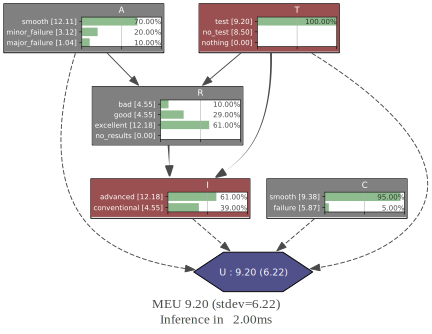

In [24]:
gnb.showInference(influence_diagram,engine=inference_engine,size="6!")